## Task 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Считаем и отобразим данные

In [3]:
with np.load('data.npz') as data:
    A, C = data['A'], data["C"]

((25, 60), (1500, 816))

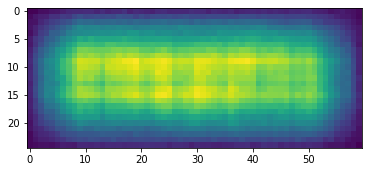

In [4]:
plt.imshow(A)
A.shape, C.shape

In [5]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype=A.dtype)
    A = np.flipud(A) 
    for i, row in enumerate(A):
        a[i*w:i*w+w] = row
    return a

In [6]:
def vec2mat(a, shape):
    h, w = shape
    A = np.zeros(shape, dtype=a.dtype)
    for i in range(h):
        A[i, :] = a[i*w:i*w+w]
    return np.flipud(A)

Посмотрим, как наш фильтр действует на картину

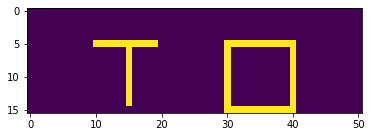

In [7]:
X = np.zeros((16,51))
X[5:15,15] = 1
X[5:15,30] = 1
X[5:15,40] = 1
X[5,10:20] = 1
X[5,30:41] = 1
X[15,30:41] = 1
plt.imshow(X)
plt.show()

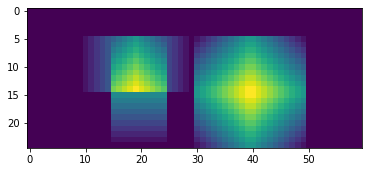

In [8]:
x = mat2vec(X)
plt.imshow(vec2mat(C @ x, (25, 60)))
plt.show()

Теперь найдем SVD разложение нашей матрицы C

In [10]:
u, s, vh = np.linalg.svd(C, full_matrices=False)
C.shape, s.shape

((1500, 816), (816,))

По размеру C видно, что система уравнений $a = Ca_0$ переопределена.

Будем решать ее методом наименьших квалратов, так как наша ошибка распределена норамльно. Для начала найдем решение "влом", с помощью псевдообратной матрицы С.

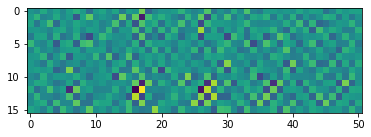

In [12]:
a = mat2vec(A)
a0 = np.linalg.pinv(C) @ a
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0)
plt.show()

Ничего не видно и не понятно. Попробуем оставить в разложении матрицы С только первые n сингулярных значений.

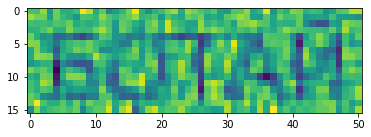

In [13]:
n = 370
s0 = np.zeros(816)
s0[:n] = s[:n]
C0 = np.dot(u, np.dot(np.diag(s0), vh))

A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
plt.imshow(A0_guess)
plt.show()

Уже так можно прочитать, что написанно. Можно попробовать увеличить контрастность.

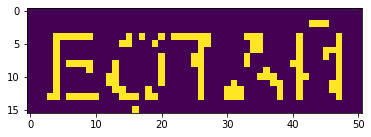

In [14]:
A1 = np.zeros((16, 51))
for i in range(A0_guess.shape[0]):
    for c in range(A0_guess.shape[1]):
        if A0_guess[i][c] < 110:
            A1[i][c] = 1
plt.imshow(A1)

Надпись предельно ясна, идем ботать